# False Positive Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from model import *
import shap

False positive model score:  0.8853073463268366
False negative model score:  0.9044230500906935


/Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import model
falpos_model = lgb.Booster(model_file='falpos.pkl')

# read dataset
data = pd.read_csv("positive.csv", na_values=['NULL'])
data['AcquisitionDateTime_DT'] = pd.to_datetime(data['AcquisitionDateTime_DT'])

drop_cols =  ['PatientID', 
                '12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL']  
X = data.drop(drop_cols, axis=1)
y = data['MI_Phys'] 

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

In [3]:
# explain model with SHAP
explainer = shap.Explainer(falpos_model, X100)
shap_values = explainer(X)
sample_idx = 20

100%|===================| 6651/6667 [01:49<00:00]        

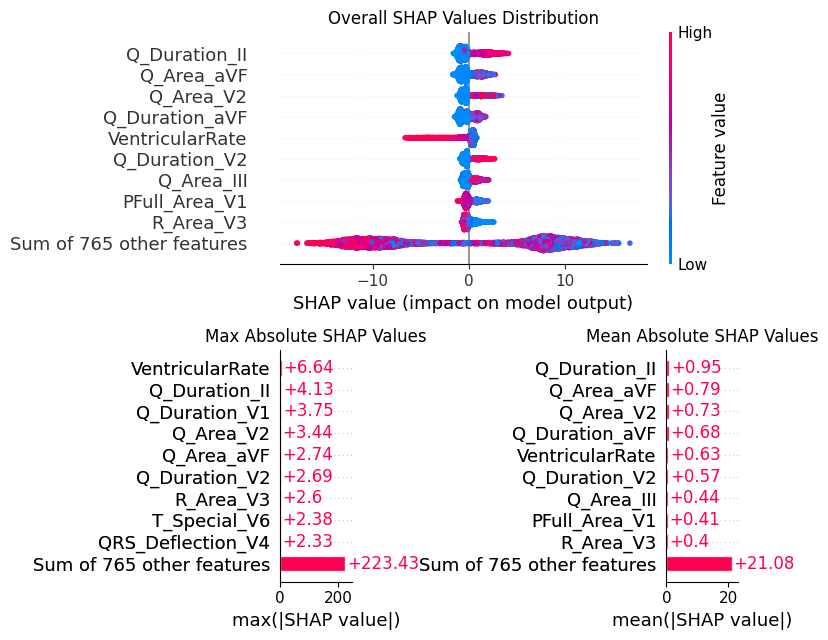

In [ ]:
### SHAP values composite plots
fig = plt.figure()
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1]) 

# subplot axes
ax1 = fig.add_subplot(gs[0, :])  
ax2 = fig.add_subplot(gs[1, 0])  
ax3 = fig.add_subplot(gs[1, 1])  

# plot 1 - show distribution of SHAP values for each feature
plt.sca(ax1) 
shap.plots.beeswarm(shap_values, show=False)
ax1.set_title("Overall SHAP Values Distribution")

# plot 2 - feature importance ranking using max absolute value
plt.sca(ax2)
shap.plots.bar(shap_values.abs.max(0), show=False)
ax2.set_title("Max Absolute SHAP Values")

# plot 3 - feature importance ranking using mean absolute value
plt.sca(ax3)
shap.plots.bar(shap_values, show=False)
ax3.set_title("Mean Absolute SHAP Values")

plt.tight_layout()
plt.show()

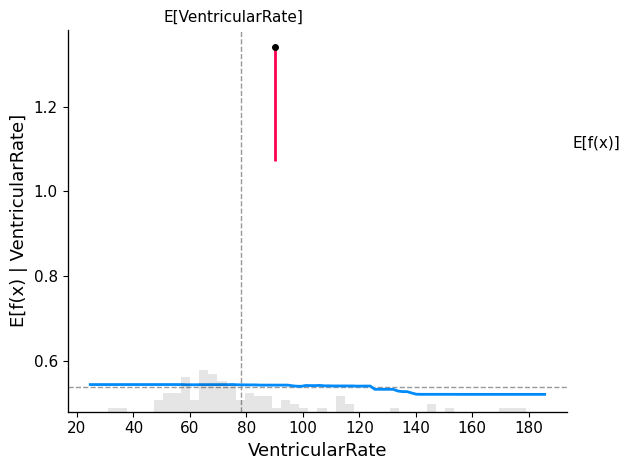

In [ ]:
# standard partial dependence plot for Q_Duration_II and Ventricular Rate
fig, ax = shap.partial_dependence_plot(
    "Q_Duration_II",
    falpos_model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[sample_idx : sample_idx + 1, :],
)

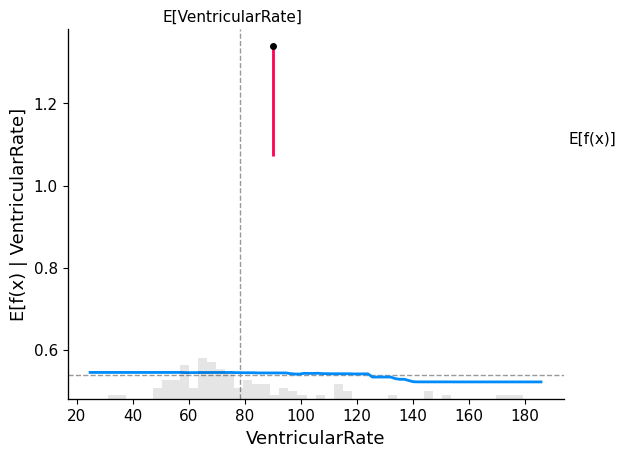

In [ ]:
fig, ax = shap.partial_dependence_plot(
    "VentricularRate",
    falpos_model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[sample_idx : sample_idx + 1, :],
)

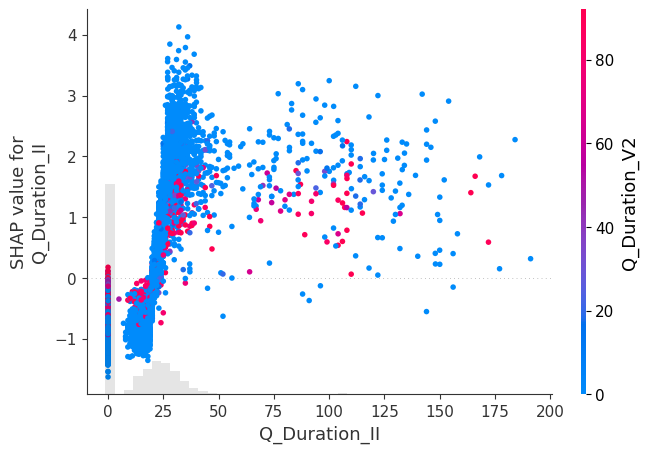

In [20]:
shap.plots.scatter(shap_values[:, "Q_Duration_II"], color=shap_values)

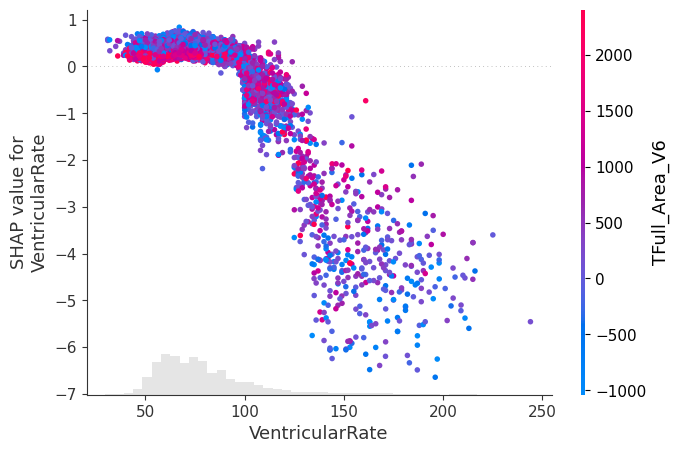

In [21]:
shap.plots.scatter(shap_values[:, "VentricularRate"], color=shap_values)

  2%|▏         | 13136/599076 [00:43<42:49, 228.00it/s]/Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 17 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(
  3%|▎         | 17787/599076 [00:56<31:33, 306.98it/s] /Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 23 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(
  3%|▎         | 19290/599076 [00:58<17:40, 546.71it/s] /Users/livia/cs620/stroke-of-luck/sol/lib/python3.12/site-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 25 (this is typically caused by constant or near-consta

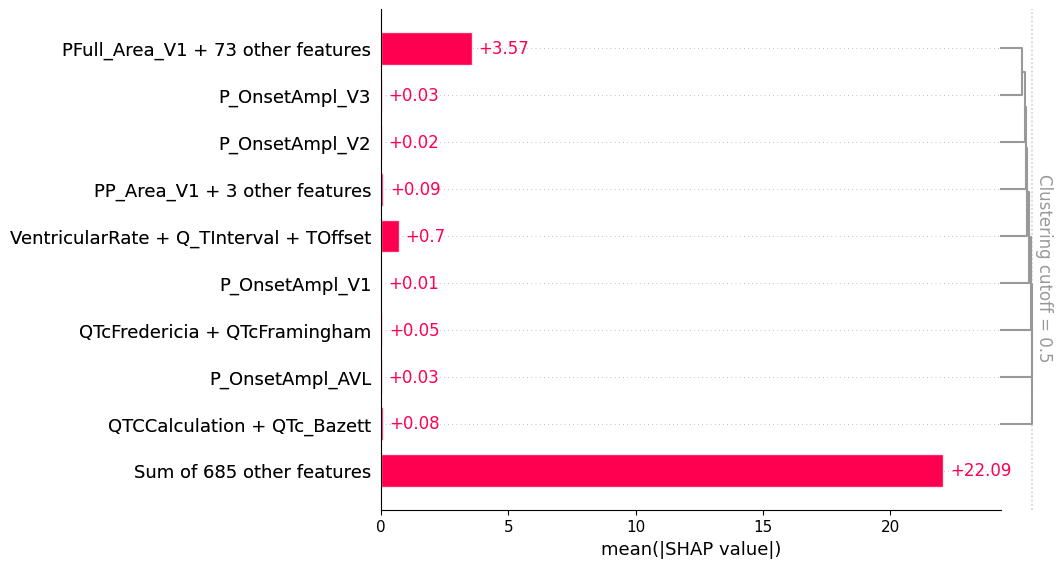

In [25]:
# investigate correlated features
clustering = shap.utils.hclust(X, y)
shap.plots.bar(shap_values, clustering=clustering)

# False Negative Model

In [ ]:
# import model
falneg_model = lgb.Booster(model_file='falneg.pkl')

# read dataset
data = pd.read_csv("negative.csv", na_values=['NULL'])
data['AcquisitionDateTime_DT'] = pd.to_datetime(data['AcquisitionDateTime_DT'])

drop_cols =  ['PatientID', 
                '12SL_Codes', 
                'Phys_Codes',
                'TestID', 
                'Source', 
                'Gender',
                'PatientAge', 
                'AcquisitionDateTime_DT',
                'MI_Phys',
                'MI_12SL']  
X = data.drop(drop_cols, axis=1)
y = data['MI_Phys'] 
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

In [ ]:
# explain model with SHAP
explainer = shap.Explainer(falpos_model, X100)
shap_values = explainer(X)
sample_idx = 20

In [ ]:
### SHAP values composite plots
fig = plt.figure()
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1]) 

# subplot axes
ax1 = fig.add_subplot(gs[0, :])  
ax2 = fig.add_subplot(gs[1, 0])  
ax3 = fig.add_subplot(gs[1, 1])  

# plot 1 - show distribution of SHAP values for each feature
plt.sca(ax1) 
shap.plots.beeswarm(shap_values, show=False)
ax1.set_title("Overall SHAP Values Distribution")

# plot 2 - feature importance ranking using max absolute value
plt.sca(ax2)
shap.plots.bar(shap_values.abs.max(0), show=False)
ax2.set_title("Max Absolute SHAP Values")

# plot 3 - feature importance ranking using mean absolute value
plt.sca(ax3)
shap.plots.bar(shap_values, show=False)
ax3.set_title("Mean Absolute SHAP Values")

plt.tight_layout()
plt.show()